**1D Convolutional Neural Network Classifier**

Data Import and Preprocessing

In [5]:
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Image as Image1
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from ipywidgets import Image
import numpy as np

2023-04-24 19:06:10.461627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [87]:
import pandas as pd
feat = pd.read_csv('features.csv')
df_R_features = pd.read_csv('newFeaturesR.csv')
df_T_features = pd.read_csv('newFeaturesT.csv')
df_R_target = pd.read_csv('newTargetR.csv')
df_T_target = pd.read_csv('newTargetT.csv')

In [ ]:
df_R_features.pop('SNo')
df_T_features.pop('SNo')
df_R_target.pop('SNo')
df_T_target.pop('SNo')
df_features = pd.concat([df_R_features, df_T_features])
df_target = pd.concat([df_R_target, df_T_target])

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_target['Flag'] = le.fit_transform(df_target['Flag'])

In [102]:
df_R_features

,CAN,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,0.647024,0.000000,0.038095,0.057143,0.151786,0.060119,0.107143,0.004762,0.000000
1,0.237500,0.151190,0.058333,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000
2,0.361905,0.016071,0.021429,0.021429,0.028571,0.151786,0.085119,0.064881,0.034524
3,0.400000,0.059524,0.000000,0.077976,0.017262,0.013095,0.002976,0.135119,0.000000
4,0.470238,0.041071,0.021429,0.092857,0.005357,0.021429,0.022619,0.000000,0.070238
...,...,...,...,...,...,...,...,...,...
334973,0.470238,0.041071,0.022024,0.119048,0.005357,0.022024,0.020833,0.000000,0.069643
334974,0.237500,0.151190,0.064286,0.000000,0.000000,0.000000,0.036310,0.000000,0.000000
334975,0.361905,0.016667,0.022024,0.022024,0.028571,0.151786,0.085119,0.064881,0.002381
334976,0.400000,0.002381,0.000000,0.079167,0.017262,0.013095,0.002976,0.135119,0.000000


In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load feature data into a pandas DataFrame
X_df = pd.read_csv('features.csv')

# Load target data into a pandas DataFrame
y_df = pd.read_csv('target.csv')

# Merge the feature and target DataFrames on a common index
data = pd.merge(X_df, y_df)
data.pop('Unnamed: 0')

# Separate the input features from the labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values



In [187]:
y_binary = np.where(y == 'R', 0, 1)

In [188]:
y_binary

array([0, 0, 0, ..., 0, 0, 0])

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [191]:
y_test

array([1, 1, 0, ..., 1, 0, 0])

Model Design & Compilation

In [222]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [223]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [224]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Model Training

In [225]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
8375/8375 [==============================] - 8s 957us/step - loss: 0.0474 - accuracy: 0.9862 - val_loss: 0.0152 - val_accuracy: 0.9962
Epoch 2/10
8375/8375 [==============================] - 8s 936us/step - loss: 0.0135 - accuracy: 0.9971 - val_loss: 0.0068 - val_accuracy: 0.9987
Epoch 3/10
8375/8375 [==============================] - 8s 962us/step - loss: 0.0086 - accuracy: 0.9983 - val_loss: 0.0055 - val_accuracy: 0.9988
Epoch 4/10
8375/8375 [==============================] - 8s 952us/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0088 - val_accuracy: 0.9982
Epoch 5/10
8375/8375 [==============================] - 8s 975us/step - loss: 0.0060 - accuracy: 0.9988 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 6/10
8375/8375 [==============================] - 8s 956us/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0068 - val_accuracy: 0.9985
Epoch 7/10
8375/8375 [==============================] - 8s 907us/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0029 -

Results

In [196]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Validation Accuracy: " + str(accuracy))
print("Validation Loss: " + str(loss))

2094/2094 [==============================] - 1s 551us/step - loss: 0.0040 - accuracy: 0.9994
Validation Accuracy: 0.9993581771850586
Validation Loss: 0.004002314992249012


In [212]:
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

2094/2094 [==============================] - 1s 430us/step


In [215]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51862    17]
 [   10 15107]]


In [216]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix:")
print(cm_norm)

Normalized Confusion Matrix:
[[9.99672314e-01 3.27685576e-04]
 [6.61506913e-04 9.99338493e-01]]


In [217]:
TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

In [219]:
print("Sensitivity: {:.5f}".format(sensitivity))
print("Specificity: {:.5f}".format(specificity))

Sensitivity: 0.99967
Specificity: 0.99934


In [221]:
accuracy = (cm[0, 0] + cm[1, 1]) / sum(sum(cm))
precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])

print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))

Accuracy: 0.99960
Precision: 0.99981


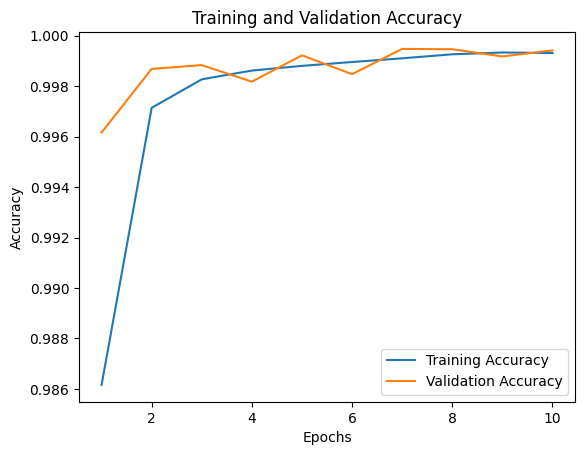

In [227]:
import matplotlib.pyplot as plt
num_epochs = range(1, 11) 
plt.plot(num_epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(num_epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

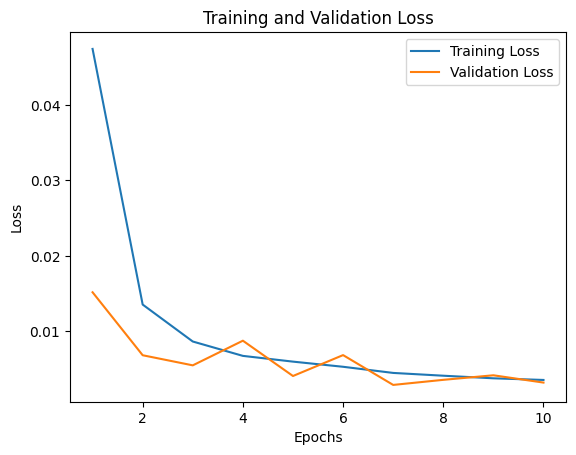

In [228]:
num_epochs = range(1, 11) 
plt.plot(num_epochs, history.history['loss'], label='Training Loss')
plt.plot(num_epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [229]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.9991071723818656


In [230]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 7, 32)             128       
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 3, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 1, 32)             3104      
                                                                 
 flatten_22 (Flatten)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 64)                2112      
                                                                 
 dense_27 (Dense)            (None, 2)                 130       
                                                     